## Shrinkage Methods : L2 (Ridge) and L1 (Lasso) regularization for multivariate linear regression

Last week, you observed the effects of overfitting of given data because of high model complexity on "data_poly1.npz" and "data_poly2.npz". You saw how overfitting occured due to the least squares regression model describing random errors or noise in the data instead of the underlying distribution thus causing an increase in test error. (although the training error reduced with increasing complexity). This week we will explore the two main explanations of the overfitting phenomenon :
- High model complexity
- Multicollinearity of predictors

Then we will go on to look at the two most widely used techniques to reduce overfitting of data on using linear regression models: Ridge and Lasso regression.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 
a = np.load("data_poly1.npz")
Y =np.array(a["y"]).reshape(len(a['y']),1)
X =np.array(a["x"]).reshape(len(a['x']),1)
df2 = np.load("data_poly2.npz")


### Overfitting of data due to high model complexity

#### Ridge regression
Last week you fit a $9$th order polynomial to the given dataset "data_poly1.npz" containing 10 distinct points. The polynomial fit all the data points exactly and thus wrongly modelled the noise too. 
- Now use polynomial regression of order 9 along with L2 norm regularization (Ridge regression) on "data_poly1.npz" for $\lambda=0, 0.1, 1, 10$ and $100$ and plot the true vs predicted values for each $\lambda$. 

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.68015e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.68015e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.68015e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.81985e-17): result may not be accurate.
  overwrite_a=True).T


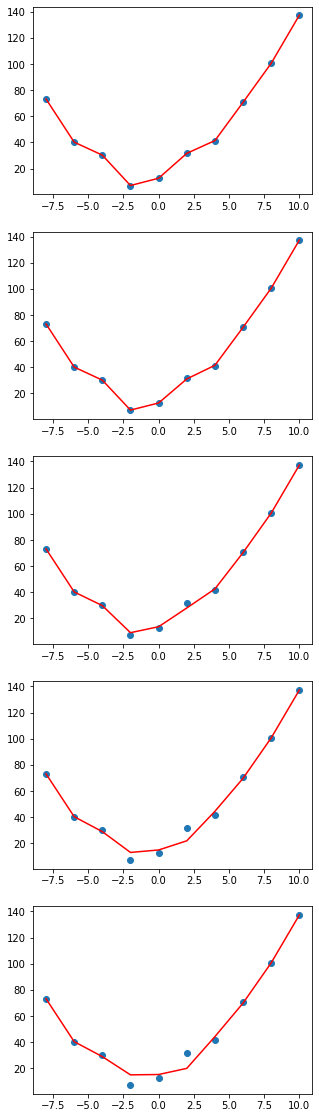

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2) 
alpha = [] 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator
fig = plt.figure(figsize = (5, 20))
# Loop to compute the different values of cross-validation scores
j=1
for i in (0,0.1,1,10,100):
    poly_reg = PolynomialFeatures(degree=9)
    X_poly = poly_reg.fit_transform(X)
    ridgeModel = Ridge(alpha = i) 
    ridgeModel.fit(X_poly, Y)
    y_poly_pred = ridgeModel.predict(X_poly)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    ax1 = fig.add_subplot(5,1,j)
    plt.scatter(X,Y)
    plt.plot(x, y_poly_pred, color='r')
    j=j+1


#### Lasso regression
- Now use polynomial regression of order 9 along with L1 norm regularization (Lasso regression) on "data_poly1.npz" for $\lambda=0, 0.1, 1, 10$ and $100$ and plot the true vs predicted values for each $\lambda$. 

C:\Users\vishn\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.10293251869476, tolerance: 1.5079821577240078
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75.04668617363936, tolerance: 1.5079821577240078
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coor

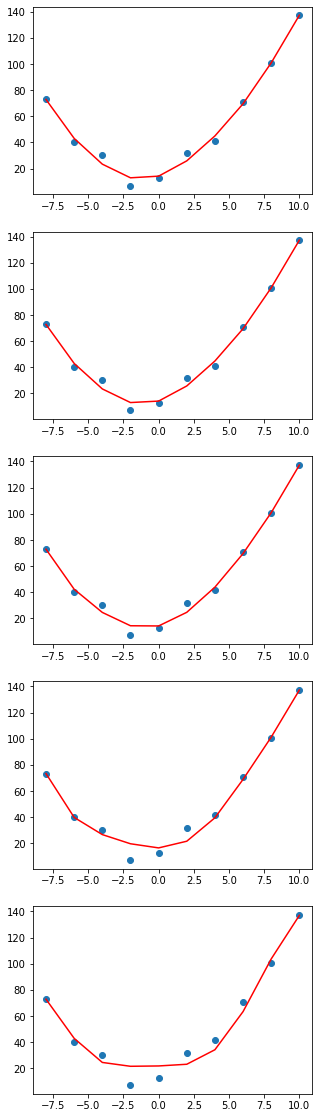

In [5]:
fig = plt.figure(figsize = (5, 20))
# Loop to compute the different values of cross-validation scores
j=1
for i in (0,0.1,1,10,100):
    poly_reg = PolynomialFeatures(degree=9)
    X_poly = poly_reg.fit_transform(X)
    lassoModel = Lasso(alpha = i) 
    lassoModel.fit(X_poly, Y)
    y_poly_pred = lassoModel.predict(X_poly)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    ax1 = fig.add_subplot(5,1,j)
    plt.scatter(X,Y)
    plt.plot(x, y_poly_pred, color='r')
    j=j+1

Plot the training and validation set ("data_poly2.npz") mean square errors vs $\lambda$ for ridge and lasso regression. Compare with least squares polynomial regression of order $9$ from the previous week.  

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.68015e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.15287223497208, tolerance: 1.5079821577240078
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28331e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.16913597702148, tolerance: 1.5079821577240078
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: I

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.34174e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.64581291760621, tolerance: 1.5079821577240078
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.40732e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109.65358430954826, tolerance: 1.5079821577240078
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning:

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558.3044641927305, tolerance: 1.5079821577240078
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604.8708748888483, tolerance: 1.5079821577240078
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653.7411621478602, tolerance: 1.5079821577240078
  positive)


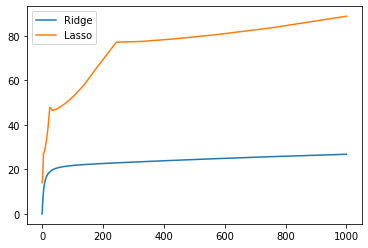

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
lamdas = np.logspace(-3,3,50)
error_ridge = []
error_lasso = []
for i in lamdas:
    poly_reg = PolynomialFeatures(degree=9)
    X_poly = poly_reg.fit_transform(X)
    ridgeModel = Ridge(alpha = i) 
    ridgeModel.fit(X_poly, Y)
    y_poly_pred_ridge = ridgeModel.predict(X_poly)
    lassoModel = Lasso(alpha = i) 
    lassoModel.fit(X_poly, Y)
    y_poly_pred_lasso = lassoModel.predict(X_poly)
    ridge_train = (mean_squared_error(Y,y_poly_pred_ridge))
    error_ridge.append(ridge_train)
    lasso_train = (mean_squared_error(Y,y_poly_pred_lasso))
    error_lasso.append(lasso_train)
plt.plot(lamdas,error_ridge)
plt.plot(lamdas,error_lasso)
plt.legend(['Ridge', 'Lasso'], loc='upper left')


C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.68015e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.15287223497208, tolerance: 1.5079821577240078
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28331e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70.16913597702148, tolerance: 1.5079821577240078
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: I

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40977e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295.56278004364697, tolerance: 1.5079821577240078
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8393e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 307.6206817328024, tolerance: 1.5079821577240078
  positive)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: I

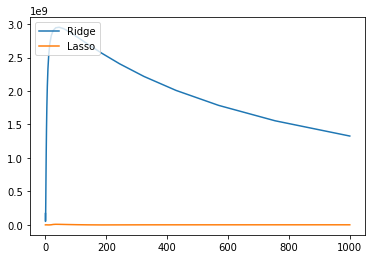

In [7]:
data = np.load("data_poly2.npz")
lamdas = np.logspace(-3,3,50)
error_ridge = []
error_lasso = []
for i in lamdas:
    poly_reg = PolynomialFeatures(degree=9)
    X_poly = poly_reg.fit_transform(X)
    ridgeModel = Ridge(alpha = i) 
    ridgeModel.fit(X_poly, Y)
    x_test_poly = poly_reg.fit_transform(data['x'].reshape(-1, 1))
    y_test_ridge_pred = ridgeModel.predict(x_test_poly)
    ridge_test = (mean_squared_error(data['y'].reshape(-1, 1),y_test_ridge_pred))
    lassoModel = Lasso(alpha = i) 
    lassoModel.fit(X_poly, Y)
    x_test_poly = poly_reg.fit_transform(data['x'].reshape(-1, 1))
    y_test_lasso_pred = lassoModel.predict(x_test_poly)
    lasso_test = (mean_squared_error(data['y'].reshape(-1, 1),y_test_lasso_pred))
    error_ridge.append(ridge_test)
    error_lasso.append(lasso_test)
plt.plot(lamdas,error_ridge)
plt.plot(lamdas,error_lasso)
plt.legend(['Ridge', 'Lasso'], loc='upper left')

#### Observations and inferences:
- Explain how the variances of the least squares estimates vary as the number of features increase. Comment for the following three cases :
 - n>>p
 - n~p
 - n<p

n : number of data points <br>
p : number of features <br>
- Why do ridge and lasso regression improve over least squares regression? Make arguments based on the training and validation set error plots.
- What can you say about the model complexity as $\lambda$ increases?

Ans <br>
1. For N>>P, the vairance is very less as n is too high
2. For N~P. The variance is very large, as the fucntion is inversely propotional to N-P
3. For N<P, there will be multiple fitting curves possible for same data
<br>



Ridge and Lasso put a penalty on the high coefficents of the model. This reduces the complexity of model making it more easy to compute. Based on training and validation sets, We can say that as we increase our hyperparameter, we see the curve is not fitting the training data lesser but at the same time our test data fitting becomes better. As $\lambda$ increases, the model complexity decreases as the co-efficents keep decreasing and converge to zero

### Overfitting of data due to multicollinearity

The coefficient estimates of least squares regression can also change erratically in responses to small changes in data when the predictors are highly correlated. 

#### Uncorrelated features
The three columns of $X$ contain the three features. $Y$ is generated as a linear combination of two features as shown. 
- Compute the correlations between the features.
- Fit a linear regression, lasso ($\lambda=0.1$) and ridge ($\lambda=10$) regression model and compare the coefficients with the expected coefficients. 
- Does the linear regression model recover the underlying structure of the data? (despite significant noise in the data)
- How often do you think that real life datasets have uncorrelated features? 
- Which of the two methods (ridge and lasso regression) performs feature selection? Which model results in sparser weights?



In [25]:
import numpy as np

np.random.seed(0)
size = 5000
X = np.random.normal(0, 1, (size, 3))
#Y = X0 + 2*X1 + noise
#X0,X1 and X2 are the features
Y = X[:,0] + 2*X[:,1] + np.random.normal(0, 2, size)
 

In [26]:
 df = pd.DataFrame(X)

In [10]:
df.corr()

,0,1,2
0,1.000000,0.015683,-0.012066
1,0.015683,1.000000,0.013734
2,-0.012066,0.013734,1.000000


In [11]:
rr = Ridge(alpha=10)

In [12]:
rr.fit(df, Y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [13]:
rr.coef_

array([ 0.98231412,  1.99112131, -0.04062747])

In [14]:
ll = Lasso(alpha=0.1)

In [15]:
ll.fit(df, Y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
ll.coef_

array([ 0.88555304,  1.89248636, -0.        ])

In [27]:
regression_model = LinearRegression()
regression_model.fit(df,Y)
regression_model.coef_

array([ 0.98422873,  1.99522378, -0.04074316])

Ans: Linear regression somewhat covers, but lasso and ridge do a better job <br>
No,they aren't coorelated to it <br>
Lasso regression gives you sparser weights

#### Correlated features
The three columns of $X$ contain three features. $Y$ is generated as a linear combination of the three features using 10 different random seeds as shown.
- Compute the correlations between the features.
- Fit a linear, lasso ($\lambda=0.1$) and ridge ($\lambda=10$) regression model corresponding to data generated from each random seed and compare the coefficients with the expected coefficients.
- Compare the stability of the three models. Here stability is wrt fluctuations in coefficients on minor changes in data achieved through a different random seed in each iteration.
- Do you expect lasso and ordinary linear regression models to be stable for datsets with correlated features? Explain giving reasons.

In [32]:
size = 100
 
#We run the method 10 times with different random seeds
for i in range(10):
    print("Random seed %s" % i)
    np.random.seed(seed=i)
    X_seed = np.random.normal(0, 1, size)
    #X0,X1 and X2 are the features
    X0 = X_seed + np.random.normal(0, .1, size)
    X1 = X_seed + np.random.normal(0, .1, size)
    X2 = X_seed + np.random.normal(0, .1, size)
    Y = X0 + X1 + X2 + np.random.normal(0, 1, size)
    X = np.array([X0, X1, X2]).T
    df = pd.DataFrame(X)
    rr = Ridge(alpha=10)
    rr.fit(df,Y)
    print('Ridge:' ,rr.coef_)
    ll = Lasso(alpha=0.1)
    ll.fit(df,Y)
    print('Lasso:',ll.coef_)
    regression_model = LinearRegression()
    regression_model.fit(df,Y)
    print('Linear:',regression_model.coef_)
    


Random seed 0
Ridge: [0.93832131 1.05887277 0.87652644]
Lasso: [0.68342507 2.1773519  0.        ]
Linear: [ 0.7284403   2.30926001 -0.08219169]
Random seed 1
Ridge: [0.98409577 1.06792673 0.75855367]
Lasso: [0.85351108 1.95094851 0.        ]
Linear: [ 1.15181561  2.36579916 -0.59900864]
Random seed 2
Ridge: [0.97159124 0.94256202 1.08539406]
Lasso: [0.76397325 0.26686705 1.97766971]
Linear: [0.69734749 0.32155864 2.08590886]
Random seed 3
Ridge: [0.91891806 1.00474386 1.03276594]
Lasso: [0.08079442 1.32075963 1.53706794]
Linear: [0.28735446 1.25386129 1.49054726]
Random seed 4
Ridge: [0.96401621 0.98152524 1.0983599 ]
Lasso: [0.20556561 0.6505239  2.18711432]
Linear: [0.18726691 0.77214206 2.1894915 ]
Random seed 5
Ridge: [0.75819864 1.01085804 1.1390417 ]
Lasso: [0.         0.74612018 2.17478229]
Linear: [-1.2912413   1.59097473  2.74727029]
Random seed 6
Ridge: [1.01616507 0.89032238 1.0907386 ]
Lasso: [1.12120654 0.         1.86279522]
Linear: [ 1.19909595 -0.0306915   1.91454912]
R

In [21]:
df.corr()

,0,1,2
0,1.000000,0.991079,0.99150
1,0.991079,1.000000,0.99255
2,0.991500,0.992550,1.00000


1.Ridge is the most stable model and lasso is the slightly lesser and linear being the least <br>

2. Lasso is unstable as it does feature selection which makes it to select one of the correlated variables because of which coefficents keep changing